In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.fft import fft, ifft, fftfreq

In [98]:
NUM_PORTS = 4
SIZE = 200
imp0 = 377
connect = 50
tau = 1
kappa = 4

maxTime = 400

ez1_tab = np.zeros([maxTime, SIZE])
ez2_tab = np.zeros([maxTime, SIZE])

In [99]:
def gaussian(qTime):
    return np.exp(-(qTime - 30.) * (qTime - 30.) / 100.) /imp0

In [101]:
class field:
    def __init__(self, NUM_PORTS,SIZE):
        self.ez = np.zeros([NUM_PORTS,SIZE])
        self.hy = np.zeros([NUM_PORTS,SIZE])
        
    def hy_update(self, port_no):
        self.hy[port_no,SIZE-1] = self.hy[port_no,SIZE-2] # simple ABC for hy[SIZE-1]
        for j in range(SIZE-1):
            self.hy[port_no,j] = self.hy[port_no,j] + (self.ez[port_no,j+1] - self.ez[port_no,j]) / imp0;
            
    def ez_update(self, port_no):
        for j in range(1,SIZE):
            self.ez[port_no,j] = self.ez[port_no,j] + (self.hy[port_no,j] - self.hy[port_no,j-1]) * imp0;
        self.ez[port_no,0] = self.ez[port_no,1]

    def hy_sources(self, qTime, port_no):
        s = gaussian(qTime)
        self.hy[0,49] -= s /imp0 
        
    def ez_sources(self, qTime, port_no):
        s = gaussian(qTime)     
        self.ez[0,49] += s      

In [102]:
f1 = field(NUM_PORTS,SIZE)

for qTime in range(maxTime):

    pn = 0
    f1.hy_update(pn)
    f1.hy_sources(qTime,pn)
    f1.ez_update(pn)
    f1.ez_sources(qTime,pn)
 # simple ABC on the left side



    # s_new = ez[0,-1] * tau
    
    # hy[1,SIZE-1] = hy[1,SIZE-2] # simple ABC for hy[SIZE-1]


    # for j in range(SIZE-1):
    #     hy[1,j] = hy[1,j] + (ez[1,j+1] - ez[1,j]) / imp0;

    # hy[1,1] -= s_new /imp0   
        
    # ez[1,0] = ez[1,1] # simple ABC on the left side
    
    # for j in range(1,SIZE):
    #     ez[1,j] = ez[1,j] + (hy[1,j] - hy[1,j-1]) * imp0;

    # ez[1,1] += s_new

    
    ez1_tab[qTime,:] = f1.ez[0,:]   
    # ez2_tab[qTime,:] = ez[1,:]   

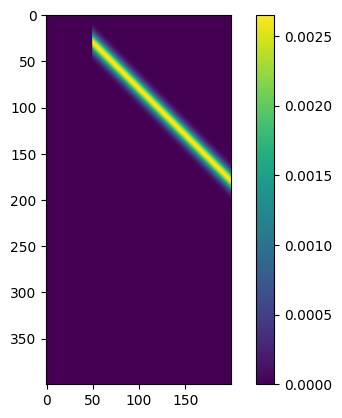

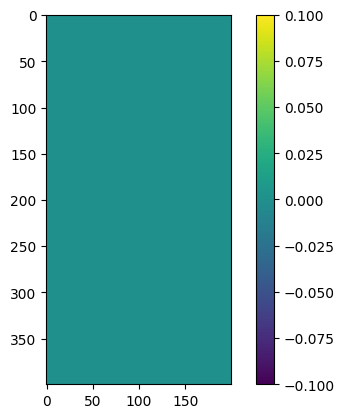

In [103]:
plt.imshow(ez1_tab)
plt.colorbar()
plt.show()
plt.imshow(ez2_tab)
plt.colorbar()
# plt.plot(ez_tab[:,15])